In [1]:
import numpy as np 
import pandas as pd 

import os, os.path

from keras.applications import ResNet50

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

#image preprocessing libraries
import skimage
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize


(512, 512)

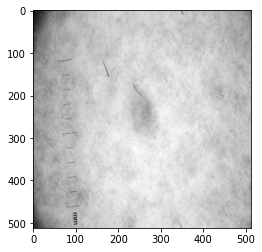

In [2]:
#path leading to training images
training_path = '../input/siim-isic-melanoma-classification/jpeg/train/' 
#generate a list of image names
training_image_names = [name for name in os.listdir(training_path)]

#testing the image loading and preporcessing
test_image = io.imread(training_path+training_image_names[0])
test_image = resize(test_image, (512, 512))
test_image = rgb2gray(test_image)

plt.imshow(test_image, cmap=plt.cm.gray)
test_image.shape


In [3]:
## load training csv
training_labels = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv', sep=',')

#the train.csv holds more information than we need, thus we extract only the needed columns
training_labels = training_labels[['image_name', 'target']]

# the targets are: 0 = benign, 1 = malignant
#training labels that have a target of 0
training_labels_0 = pd.DataFrame(training_labels.loc[training_labels['target'] == 0])
#training labels that have a target of 1 
training_labels_1 = pd.DataFrame(training_labels.loc[training_labels['target'] == 1])
 
#in advance turn both pandas dataframes to numpy arrays, as we need to reshape their values later (a numpy function)
#and because the resnet model only accepts numpy arrays as inputs
training_labels_0 = np.asarray(training_labels_0)
training_labels_1 = np.asarray(training_labels_1)

#the structures of both numpy arrays are as follows:
#training_labels_# [index of the image][0 = name of the image, 1 = the target]

print("labels with a target of 0:",len(training_labels_0))
print("labels with a target of 1:",len(training_labels_1))

labels with a target of 0: 32542
labels with a target of 1: 584


In [4]:
def preprocess(image):
    #resizing...
    image = resize(image, (512,512))
    #making the image grayscale...
    image = rgb2gray(image)
    #normalising the values...
    image /= 255
    #reshaping, because the model expects an input shape of (x,y,z)
    image = np.reshape(image, (512,512,1))
    return image

In [ ]:
#Choose how many sample would you like
data_size = 2000

#prepare numpy arrays, where the loaded images and labels will be stored
training_images = np.zeros((data_size, 512, 512, 1))
training_labels = np.zeros((data_size))
        
for i in range(0, len(training_labels_1)):
    #load an image
    image = io.imread(training_path+training_labels_1[i][0]+'.jpg')
    image = preprocess(image)
    
    #storing the image
    training_images[i] = image
    #storing the target label
    training_labels[i] = training_labels_1[i][1]
    if(i%200==0):
        #simple way of informing about the progress
        print(i, training_labels_1[i][0], "uploaded")
        
#same exact steps are applied to images, with a target of 0
for i in range(len(training_labels_1), data_size):
    image = io.imread(training_path+training_labels_0[i][0]+'.jpg')
    image = preprocess(image)
    
    #storing the image
    training_images[i] = image
    #storing the image
    training_labels[i] = training_labels_0[i][1]
    if(i%200==0):
        print(i ,training_labels_0[i][0], "uploaded")
    

In [ ]:
np.savetxt("./preprocessed_images.csv", X=training_images.reshape((data_size,512*512*1)) , delimiter=', ')
np.savetxt("./preprocessed_labels.csv", X=training_labels, delimiter=', ')

In [ ]:
test = np.genfromtxt("./training_images.csv", delimiter=', ')

In [ ]:
print(training_images.shape)
print(training_labels.shape)
#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels, train_size=0.8, random_state=42)

print(x_train.shape)
print(x_test.shape)

In [ ]:
y_test[np.where(y_test==1)].shape

In [ ]:
#The resnet model.
#For some reason the model states that the amount of classes in our database is 1 
#No weights, because imagenet is not useful for our purpose and i'm not aware of other weights we can use
#The input shape follows the shape of the images
#Sigmoid, because our classes range from 0 and 1 and it's recommended for binary categorization
model = ResNet50(classes=1, weights=None, input_shape=(512,512,1), classifier_activation='sigmoid')

#Binary crossentropy because our classes range from 0 and 1
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
model.fit(x_train,y_train, batch_size=4, epochs=50, validation_data=(x_test,y_test))

In [ ]:
print(y_test[np.where(y_test==0)].shape[0])
print(y_test[np.where(y_test==1)].shape)


In [ ]:
#
data_size=50
training_images = np.zeros((data_size,512,512,1))
for index, image_name in enumerate(training_image_names[0:data_size]):
    image = io.imread(training_path+image_name)
    image = resize(image, (512, 512))
    image = rgb2gray(image)
    image /= 255
    image = np.reshape(image, (512,512,1))
    training_images[index] = image
    if(index % (data_size//4) == 0):
        print(index, image_name, "inserted")

np.savetxt('./test.csv', training_images.reshape((50,512*512*1)), delimiter=', ')
np.savetxt('./testlabels.csv', training_labels, delimiter=', ')

test = np.genfromtxt('./test.csv', delimiter=', ')
testlabels = np.genfromtxt('./testlabels.csv', delimiter=', ')

<a href="./preprocessed_images.csv"> Download File </a>